# The Parkfield experiment

California is one of the most seismically active regions in the world.  The Parkfield region, is a portion of the San Andreas fault of particular interest to seismologists because of its high number of earthquakes.

We eill take a statistical approach to study these earthquakes. 

Some usefull concepts:

* location parameter/completeness threshold ($m_t$): defines the shift of a distribution function along the x-axis.
* The Gutenberg-Richter Law: the magnitudes of earthquakes in a given region over a given time period are Exponentially distributed. This is quite convenient for characterizing earthquake magnitudes because the Exponential distribution has a single parameter,$m-m_t$
* b value:For historical reasons, seismologists do not use the mean directly, but the mean times the natural logarithm of ten. The result is a measure of seismicity, called the b-value. Most seismically active regions have a b-value right around one.
* For low magnitude earthquakes, we see a strong departure from Exponentiality.This is called *roll-off*, and is due to the fact that lower-magnitude earthquakes are difficult to detect. Now you see where the name "completeness threshold" comes from.It is the magnitude above which we can measure all earthquakes.



## The data
Sources:
* Fault data: USGS Quaternary Fault Fault and Fold Database of the United States
* Earthquake data: USGS ANSS Comprehensive Earthquake Catalog (ComCat)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandasql as ps
import dc_stat_think as dcst

In [2]:
pd.set_option('max_columns', None)
df_parkerfield = pd.read_csv (r'parkfield_earthquakes_1950-2017.csv',skiprows=2)
df_parkerfield.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,loc_name,loc_admin1,loc_admin2,loc_cc
0,1951-10-03 13:44:33.170,35.869333,-120.451000,6.0,3.67,ml,6.0,259.0,1.5480,0.43,ci,ci3322265,2016-01-28T18:07:55.760Z,"4km SSW of Parkfield, CA",earthquake,3.85,31.61,0.154,10.0,reviewed,ci,ci,Shandon,California,San Luis Obispo County,US
1,1953-05-28 07:58:34.510,36.004167,-120.501167,6.0,3.61,ml,7.0,296.0,0.9139,0.39,ci,ci3304011,2016-01-28T18:11:50.020Z,"13km NNW of Parkfield, CA",earthquake,3.28,31.61,NaN,1.0,reviewed,ci,ci,Coalinga,California,Fresno County,US
2,1961-12-14 11:51:15.410,35.970000,-120.470167,6.0,3.95,ml,12.0,297.0,0.8718,0.51,ci,ci3344629,2016-01-28T19:48:08.330Z,"9km NNW of Parkfield, CA",earthquake,3.43,31.61,0.070,11.0,reviewed,ci,ci,Coalinga,California,Fresno County,US
3,1965-02-21 18:39:24.500,35.881000,-120.383500,6.0,3.54,ml,10.0,257.0,1.5380,0.56,ci,ci3330686,2016-01-28T19:32:10.560Z,"5km ESE of Parkfield, CA",earthquake,3.75,31.61,0.048,11.0,reviewed,ci,ci,Shandon,California,San Luis Obispo County,US
4,1966-06-28 04:18:36.180,35.856500,-120.446167,6.0,3.15,ml,7.0,259.0,1.3120,0.32,ci,ci3330125,2016-01-28T19:32:35.480Z,"5km SSW of Parkfield, CA",earthquake,1.93,31.61,0.105,7.0,reviewed,ci,ci,Shandon,California,San Luis Obispo County,US


In [97]:
df_parkerfield['loc_name'].unique()

array(['Shandon', 'Coalinga', 'San Miguel'], dtype=object)

In [88]:
df_parkerfield['magNst'].unique()


array([ 10.,   1.,  11.,   7.,   8.,   0.,   5.,  12.,   9.,   4.,   6.,
         3.,  13.,   2.,  14.,  15.,  17.,  16.,  18.,  31.,  26.,  47.,
        24.,  19.,  23.,  32.,  62.,  22.,  27.,  33.,  25.,  28.,  30.,
        44.,  29.,  37.,  50.,  39.,  34.,  40.,  20.,  48.,  59.,  58.,
        54.,  60.,  35.,  71.,  52.,  46.,  53., 122.,  42.,  38.,  51.,
        21.,  70.,  77.,  91.,  76.,  36.,  56.,  69.,  49.,  63.,  90.,
        82.,  80.,  84.,  74., 321.,  75., 102.,  81., 134., 230.,  94.,
       104.,  79.,  64.,  55.,  83.,  86.,  73.,  65.,  45.,  43., 100.,
        78.,  57.,  85.,  41., 108.,  nan,  72.,  68.,  67.,  61.,  96.,
       109.,  66.,  98.,  93.,  97., 144., 141.,  87.,  88.])

In [86]:
df_parkerfield['type'].unique()

array(['earthquake'], dtype=object)

In [83]:
np.min(df_parkerfield['time'])

'1951-10-03 13:44:33.170'

In [84]:
np.max(df_parkerfield['time'])

'2017-07-16 22:34:15.590'

In [87]:
df_parkerfield['magType'].unique()

array(['ml', 'mh', 'ma', 'md', 'mc', 'mw'], dtype=object)

In [3]:
np.max(df_parkerfield['depth'])

25.825

In [4]:
np.max(df_parkerfield['mag'])

5.97

In [74]:
df_parkerfield['mag'].unique

<bound method Series.unique of 0       3.67
1       3.61
2       3.95
3       3.54
4       3.15
        ... 
9986    0.42
9987    0.21
9988    0.61
9989    0.33
9990    0.70
Name: mag, Length: 9991, dtype: float64>

In [5]:
np.min(df_parkerfield['mag'])

0.0

In [6]:
print(len(df_parkerfield.index))

9991


# 1- Earthquakes magnitudes

## EDA - Parkfield earthquake magnitudes

### The dataset

In [7]:
mags=df_parkerfield['mag'].values
#mags

As usual, we will start with EDA and plot the ECDF of the magnitudes of earthquakes detected in the Parkfield region from 1950 to 2016. 

Recalling that putting an asterisk before an argument in a function splits what follows into separate arguments. Since dcst.ecdf() returns two values, we can pass them as the x, y positional arguments to plt.plot() as plt.plot(*dcst.ecdf(data_we_want_to_plot)).

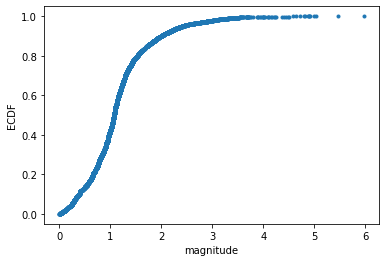

In [8]:
# Make the plot
_=plt.plot(*dcst.ecdf(mags),marker='.',linestyle='none')


# Label axes and show plot
plt.xlabel('magnitude')
plt.ylabel('ECDF')
plt.show()

We note the distinctive roll-off at magnitudes below 1.0.

## Computing the b-value
The b-value is a common metric for the seismicity of a region. We would like to calculate it often when working with earthquake data. For tasks like this that we will do often, it is best to write a function! 

In [9]:
def b_value(mags, mt, perc=[2.5, 97.5], n_reps=None):
    """Compute the b-value and optionally its confidence interval."""
    # Extract magnitudes above completeness threshold: m
    m = mags[mags >= mt]

    # Compute b-value: b
    b = (np.mean(m)-mt)*np.log(10)

    # Dranw bootstrap replicates
    if n_reps is None:
        return b
    else:
        m_bs_reps = dcst.draw_bs_reps(m,np.mean,size=n_reps)

        # Compute b-value from replicates: b_bs_reps
        b_bs_reps = (m_bs_reps - mt) * np.log(10)

        # Compute confidence interval: conf_int
        conf_int = np.percentile(b_bs_reps,perc)
    
        return b, conf_int

## The b-value for Parkfield
The ECDF is effective at exposing roll-off, as we can see below magnitude 1. Because there are plenty of earthquakes above magnitude 3, we can use mt = 3 as our completeness threshold. 

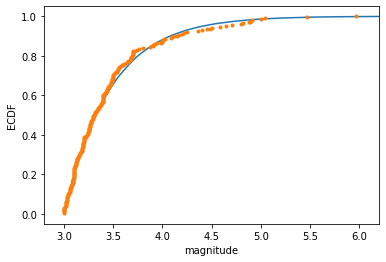


b-value: 1.08
95% conf int: [0.94, 1.24]


In [48]:
# Compute b-value and 95% confidence interval
b, conf_int = b_value(mags, mt=3, perc=[2.5, 97.5], n_reps=10000)

# Generate samples to for theoretical ECDF
m_theor = np.random.exponential(b/np.log(10), size=100000) + 3

# Plot the theoretical CDF
_ = plt.plot(*dcst.ecdf(m_theor))

# Plot the ECDF (slicing mags >= mt)
_ = plt.plot(*dcst.ecdf(mags[mags >= 3]), marker='.', linestyle='none')

# Pretty up and show the plot
_ = plt.xlabel('magnitude')
_ = plt.ylabel('ECDF')
_ = plt.xlim(2.8, 6.2)
plt.show()

# Report the results
print("""
b-value: {0:.2f}
95% conf int: [{1:.2f}, {2:.2f}]""".format(b, *conf_int))

Parkfield seems to follow the Gutenberg-Richter law very well. The b-value of about 1 is typical for regions along fault zones.

# 2-Earthquakes timing

## The dataset

Adapted from Barkun and Lindh, Science, 229, 619-624, 1985.

In [12]:
time_gap=[24.06570842, 20.07665982, 21.01848049, 12.24640657, 32.05475702, 38.2532512 ]

## Models for earthquake timing
* Exponential model: assumes that earthquakes happen like a Poisson process. This means that when the last earthquake happened has no bearing on when the next will happen. 
* Gaussian, or Normal, model: Under this model, earthquakes happen periodically.

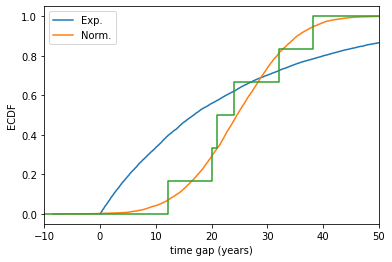

In [13]:
# Compute the mean time gap: mean_time_gap
mean_time_gap = np.mean(time_gap)

# Standard deviation of the time gap: std_time_gap
std_time_gap = np.std(time_gap)
# Generate theoretical Exponential distribution of timings: time_gap_exp
time_gap_exp = np.random.exponential(mean_time_gap,size=10000)

# Generate theoretical Normal distribution of timings: time_gap_norm
time_gap_norm = np.random.normal(mean_time_gap,std_time_gap,size=10000)

# Plot theoretical CDFs
_ = plt.plot(*dcst.ecdf(time_gap_exp))
_ = plt.plot(*dcst.ecdf(time_gap_norm))

# Plot Parkfield ECDF
_ = plt.plot(*dcst.ecdf(time_gap, formal=True, min_x=-10, max_x=50))

# Add legend
_ = plt.legend(('Exp.', 'Norm.'), loc='upper left')

# Label axes, set limits and show plot
_ = plt.xlabel('time gap (years)')
_ = plt.ylabel('ECDF')
_ = plt.xlim(-10, 50)
plt.show()

By eye, the Gaussian model seems to describe the observed data best. We will investigate the consequences of this in the next analysis, and see if we can reject the Exponential model in coming exercises.

# 3-When will the next big Parkfield quake be?
The last big earthquake in the Parkfield region was on the evening of September 27, 2004 local time. Your task is to get an estimate as to when the next Parkfield quake will be, assuming the Exponential model and also the Gaussian model. In both cases, the best estimate is given by the mean time gap, which you computed in the last exercise to be 24.62 years, meaning that the next earthquake would be in 2029. Compute 95% confidence intervals on when the next earthquake will be assuming an Exponential distribution. Do the same assuming a Normal distribution parametrized by mean_time_gap and std_time_gap.



In [98]:
#Decimal year of today
from datetime import datetime as dt
import time

def toYearFraction(date):
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = dt(year=year, month=1, day=1)
    startOfNextYear = dt(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction

In [26]:
today=toYearFraction(dt.today())
print(today)

2021.7988807077625


In [27]:
last_quake = 2004.74

In [29]:
# Draw samples from the Exponential distribution: exp_samples

exp_samples = np.random.exponential(mean_time_gap,size=100000)

# Draw samples from the Normal distribution: norm_samples
norm_samples = np.random.normal(mean_time_gap,std_time_gap,size=100000)

# No earthquake as of today, so only keep samples that are long enough
exp_samples = exp_samples[exp_samples > today - last_quake]
norm_samples = norm_samples[norm_samples > today - last_quake]

# Compute the confidence intervals with medians
conf_int_exp = np.percentile(exp_samples, [2.5, 50, 97.5]) + last_quake
conf_int_norm = np.percentile(norm_samples, [2.5, 50, 97.5]) + last_quake

# Print the results
print('Exponential:', conf_int_exp)
print('     Normal:', conf_int_norm)

Exponential: [2022.43242867 2038.82904679 2113.17085631]
     Normal: [2022.42380055 2031.34194055 2046.65204637]


The models given decidedly different predictions. The Gaussian model says the next earthquake is almost sure to be in the next few decades, but the Exponential model says we may very well have to wait longer.

# 4-How are the Parkfield interearthquake times distributed?

Knowing how the time between major earthquakes is distributed makes a big difference for assessing when the next earthquake will strike. It turns out that the Parkfield sequence has been central in the science of earthquake prediction.

What is a reasonable test statistic to measure how close an ECDF is to a theoretical CDF, in this case a Normal CDF?

We might take as our test statistic the maximum of distances between the ECDF and the theoretical Normal CDF. This maximal distance is the Kolmogorov-Smirnov statistic, or K-S statistic.

## Computing the value of a formal ECDF

To be able to do the Kolmogorov-Smirnov test, we need to compute the value of a formal ECDF at arbitrary points. In other words, we need a function, ecdf_formal(x, data) that returns the value of the formal ECDF derived from the data set data for each value in the array x.

In [99]:
def ecdf_formal(x, data):
    return np.searchsorted(np.sort(data), x, side='right') / len(data)

## Computing the K-S statistic


In [100]:
def ks_stat(data1, data2):
    # Compute ECDF from data: x, y
    x,y = dcst.ecdf(data1)
    
    # Compute corresponding values of the target CDF
    cdf = dcst.ecdf_formal(x,data2)

    # Compute distances between concave corners and CDF
    D_top = cdf - y

    # Compute distance between convex corners and CDF
    D_bottom = cdf - y + 1/len(data1)

    return np.max((D_top, D_bottom))

## Drawing KS replicates

In [101]:
def draw_ks_reps(n, f, args=(), size=10000, n_reps=10000):
    # Generate samples from target distribution
    x_f = f(*args,size=size)
    
    # Initialize K-S replicates
    reps = np.empty(n_reps)
    
    # Draw replicates
    for i in range(n_reps):
        # Draw samples for comparison
        x_samp = f(*args,size=n)
        
        # Compute K-S statistic
        reps[i] = dcst.ks_stat(x_samp,x_f)

    return reps

## The K-S test for Exponentiality
We will test the null hypothesis that the interearthquake times of the Parkfield sequence are Exponentially distributed. That is, earthquakes happen at random with no memory of when the last one was. Note: This calculation is computationally intensive, so it will take about 10 seconds to complete.

In [102]:
# Draw target distribution: x_f
x_f = np.random.exponential(mean_time_gap,size=10000)

# Compute K-S stat: d
d = dcst.ks_stat(time_gap,x_f)

# Draw K-S replicates: reps
reps = dcst.draw_ks_reps(len(time_gap), np.random.exponential, 
                         args=(mean_time_gap,), size=10000, n_reps=10000)

# Compute and print p-value
p_val = np.sum(reps >= d) / 10000
print('p =', p_val)

p = 0.2532


That's a p-value above 0.2. This means that the Parkfield sequence is not outside the realm of possibility if earthquakes there are a Poisson process. This does not mean that they are generated by a Poisson process, but that the observed sequence is not incongruous with that model. The upshot is that it is really hard to say when the next Parkfield quake will be.